In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
import seaborn as sns


Loading the Dataset

In [2]:
df=pd.read_csv('UpdatedResumeDataSet.csv')


In [3]:
df.head()


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


Visualizing Resume Categories

In [4]:
df.shape

(962, 2)

In [5]:
df['Category'].value_counts()  # Count the number of resumes in each category

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

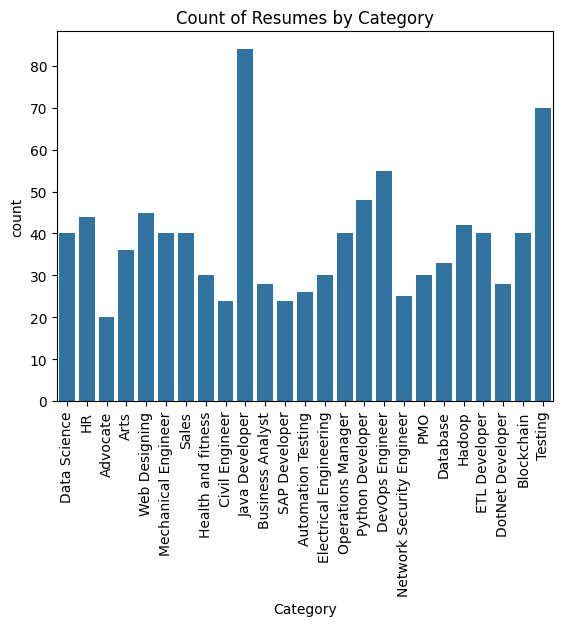

In [6]:
# plt.figure(figsize=(15, 5))  
sns.countplot(x='Category', data=df)
plt.title('Count of Resumes by Category')
plt.xticks(rotation=90)  
plt.show()    


Distribution of Resume Categories

In [7]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

([<matplotlib.patches.Wedge at 0x1ab55845b80>,
 [Text(1.058871227218848, 0.29797940225467084, 'Data Science'),
  Text(0.7841417277955074, 0.7714413462667635, 'HR'),
  Text(0.41347312332933783, 1.0193331036929403, 'Advocate'),
  Text(0.053862303159734344, 1.0986805051052508, 'Arts'),
  Text(-0.27717597647551645, 1.0645062132579801, 'Web Designing'),
  Text(-0.5706079221763859, 0.9404289442321242, 'Mechanical Engineer'),
  Text(-0.8089120194310812, 0.7454269547178518, 'Sales'),
  Text(-0.9773197556910534, 0.5048228353947349, 'Health and fitness'),
  Text(-1.0745481947062527, 0.23525768266633296, 'Civil Engineer'),
  Text(-1.0988505276751686, -0.05027442518820011, 'Java Developer'),
  Text(-1.0485773817141402, -0.3323935537243749, 'Business Analyst'),
  Text(-0.9271404255154017, -0.5919549234317762, 'SAP Developer'),
  Text(-0.7427816407083776, -0.8113417493427605, 'Automation Testing'),
  Text(-0.5207133706140742, -0.9689466371600295, 'Electrical Engineering'),
  Text(-0.2910572162881381

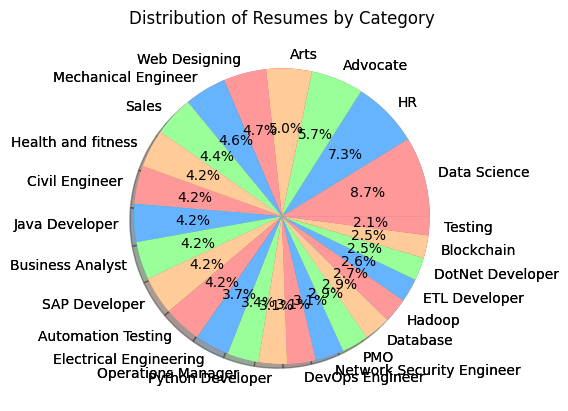

In [8]:
counts=df['Category'].value_counts()  
lables=df['Category'].unique()
# plt.figure(figsize=(15,10))
plt.pie(counts, labels=lables)
plt.title('Distribution of Resumes by Category')
plt.pie(counts, labels=lables, autopct='%1.1f%%',shadow=True,colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])


Exploring Resume

In [9]:
df['Category'][0]

'Data Science'

In [10]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [11]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

Cleaning Data


In [12]:
import re

def cleanResume(txt):
    cleanTxt = re.sub(r'RT|CC', ' ', txt)  # Remove RT and CC
    cleanTxt = re.sub(r'http\S+', ' ', cleanTxt)  # Remove URLs
    cleanTxt = re.sub(r'@\S+', ' ', cleanTxt)  # Remove @mentions
    cleanTxt = re.sub(r'#\S+', ' ', cleanTxt)  # Remove hashtags
    cleanTxt = re.sub(r'[^\x00-\x7F]+', ' ', cleanTxt)  # Remove non-ASCII characters
    cleanTxt = re.sub(r'[^\w\s]', ' ', cleanTxt)  # Remove punctuation (commas, colons, etc.)
    cleanTxt = re.sub(r'\s+', ' ', cleanTxt)  # Remove extra spaces
    cleanTxt = cleanTxt.strip()  # Remove leading/trailing spaces
    return cleanTxt

# Testing the function
print(cleanResume("###### @@@@@my website is http://www.google.com, it is amazing: definitely check it out!"))



website is it is amazing definitely check it out


Applying Text Cleaning

In [13]:
df['Resume']=df['Resume'].apply(lambda x: cleanResume(x)) 
df['Resume'][0]  

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the

Words into categorical values

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
le.fit(df['Category'])
df['Category']=le.transform(df['Category']) 

In [16]:
df.Category.unique()  # Check the unique values in the 'Category' column after encoding

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

Vactorization


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english', max_features=5000)  # Limit to 5000 features for simplicity

tfidf.fit(df['Resume'])  # Fit the vectorizer to the resumes
X=tfidf.transform(df['Resume'])  # Transform the resumes into TF-IDF features
ReqTxt=tfidf.transform(df['Resume'])

Splitting the Dataset

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)  # Split the data into training and testing sets


In [20]:
X_train.shape

(769, 5000)

In [21]:
X_test.shape

(193, 5000)

Model Training

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf=KNeighborsClassifier()
clf.fit(X_train, y_train)  
ypred=clf.predict(X_test)  
print(accuracy_score(y_test, ypred))  # Print the accuracy of the model


0.9844559585492227


In [23]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

Prediction System

In [24]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))  
pickle.dump(clf, open('clf.pkl', 'wb'))

 

In [25]:
sample=''' Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃƒÂ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Services   Assurance
TECHNOLOGY ASSISTED REVIEW
TAR (Technology Assisted Review) assists in accelerating the review process and run analytics and generate reports.
* Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain, this tool implements predictive coding and topic modelling by automating reviews, resulting in reduced labor costs and time spent during the lawyers review.
* Understand the end to end flow of the solution, doing research and development for classification models, predictive analysis and mining of the information present in text data. Worked on analyzing the outputs and precision monitoring for the entire tool.
* TAR assists in predictive coding, topic modelling from the evidence by following EY standards. Developed the classifier models in order to identify ""red flags"" and fraud-related issues.

Tools & Technologies: Python, scikit-learn, tfidf, word2vec, doc2vec, cosine similarity, NaÃƒÂ¯ve Bayes, LDA, NMF for topic modelling, Vader and text blob for sentiment analysis. Matplot lib, Tableau dashboard for reporting.

MULTIPLE DATA SCIENCE AND ANALYTIC PROJECTS (USA CLIENTS)
TEXT ANALYTICS - MOTOR VEHICLE CUSTOMER REVIEW DATA * Received customer feedback survey data for past one year. Performed sentiment (Positive, Negative & Neutral) and time series analysis on customer comments across all 4 categories.
* Created heat map of terms by survey category based on frequency of words * Extracted Positive and Negative words across all the Survey categories and plotted Word cloud.
* Created customized tableau dashboards for effective reporting and visualizations.
CHATBOT * Developed a user friendly chatbot for one of our Products which handle simple questions about hours of operation, reservation options and so on.
* This chat bot serves entire product related questions. Giving overview of tool via QA platform and also give recommendation responses so that user question to build chain of relevant answer.
* This too has intelligence to build the pipeline of questions as per user requirement and asks the relevant /recommended questions.

Tools & Technologies: Python, Natural language processing, NLTK, spacy, topic modelling, Sentiment analysis, Word Embedding, scikit-learn, JavaScript/JQuery, SqlServer

INFORMATION GOVERNANCE
Organizations to make informed decisions about all of the information they store. The integrated Information Governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk.
* Scan data from multiple sources of formats and parse different file formats, extract Meta data information, push results for indexing elastic search and created customized, interactive dashboards using kibana.
* Preforming ROT Analysis on the data which give information of data which helps identify content that is either Redundant, Outdated, or Trivial.
* Preforming full-text search analysis on elastic search with predefined methods which can tag as (PII) personally identifiable information (social security numbers, addresses, names, etc.) which frequently targeted during cyber-attacks.
Tools & Technologies: Python, Flask, Elastic Search, Kibana

FRAUD ANALYTIC PLATFORM
Fraud Analytics and investigative platform to review all red flag cases.
Ã¢Â€Â¢ FAP is a Fraud Analytics and investigative platform with inbuilt case manager and suite of Analytics for various ERP systems.
* It can be used by clients to interrogate their Accounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics
Tools & Technologies: HTML, JavaScript, SqlServer, JQuery, CSS, Bootstrap, Node.js, D3.js, DC.js'''

In [26]:
import pickle
clf=pickle.load(open('clf.pkl', 'rb'))
cleaned_resume=cleanResume(sample)
input_features=tfidf.transform([cleaned_resume])  # Transform the cleaned resume into TF-IDF features
predicted_id=clf.predict(input_features)[0] # Predict the category
categoryMapping={
     15:"Java Developer", 
     23:"Testing", 
     8:"DevOps Engineer",
     20:"Python Developer", 
     24:"Web Designing", 
     12:"HR",
     13:"Hadoop", 
     3:"Blockchain", 
     10:"ETL Developer",
     18:"Operations Manager", 
     6:"Data Science", 
     22:"Sales",
     16:"Mechanical Engineer", 
     1:"Arts", 
     7:"Database",
     11:"Electrical Engineering", 
     14:"Health and fitness", 
     19:"PMO",
     4:"Business Analyst", 
     9:"Dotnet Developer", 
     2:"Automation Testing",
     17:"Network Security Engineer", 
     21:"SAP Developer", 
     5:"Civil Engineer",
     0:"Advocate"
 }
category_name = categoryMapping.get(predicted_id, "Unknown")

print(f"Predicted Category: {category_name}")
print(f"Predicted ID: {predicted_id}")  # Print the predicted ID for debugging


Predicted Category: Data Science
Predicted ID: 6
